**Predicting Stroke Events using Machine Learning**

Context
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not


Data Information

Data used for this project can be found at https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


# Load the data into a pandas dataframe
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df


In [ ]:
# Check for missing values
print(df.isnull().sum())


In [ ]:

# Explore the data
print(df.describe())


In [ ]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:

# Replace missing values in 'bmi' with the mean value
mean_bmi = df['bmi'].mean()
df['bmi'] = df['bmi'].fillna(mean_bmi)

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Split the data into features and target
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





In [ ]:
# Choose a suitable machine learning algorithm
model = RandomForestClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)
y_pred

In [142]:

# Evaluate the model's performance using various metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# Tune the hyperparameters of the model using grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)




Accuracy: 0.9393346379647749
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


C:\Users\steve\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [143]:
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.9542565830622498


In [144]:
# Write data to a CSV file to create a new sample file for prediction in prod


# Randomize the data in each column

data = pd.DataFrame(X_test.copy())

# Set a random seed for reproducibility
np.random.seed(42)

# Randomize the data in each column
for col in data.columns:
    if col != 'stroke':
        data[col] = np.random.permutation(data[col].values)

# Write the dataframe to a CSV file
data.to_csv('healthcare-dataset-randomized-preprocessed-Sample.csv', index=False)



# Load new data to make predictions
new_data = data


# Make predictions on the new data
new_pred = grid_search.predict(new_data)

print('Predictions:', new_pred != 1)

pd.DataFrame(new_pred).to_csv('new_preds.csv', index=True)

Predictions: [ True  True  True ...  True  True  True]


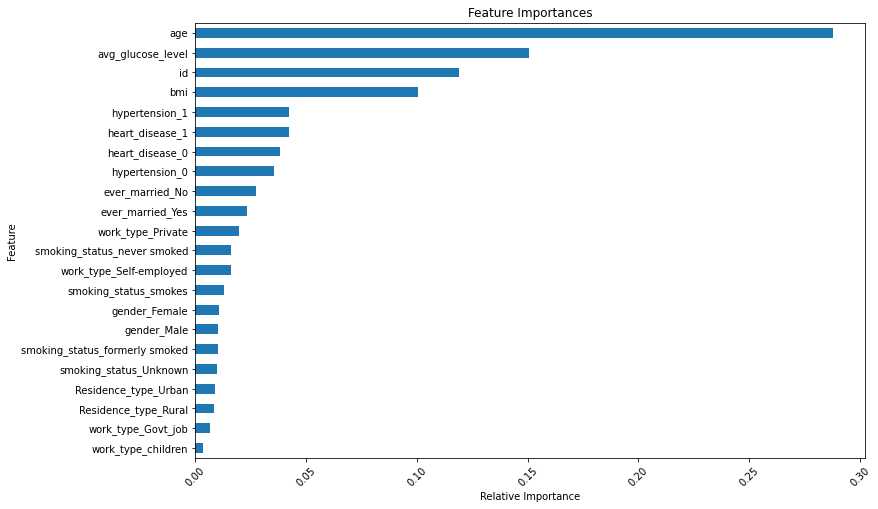

In [147]:
# Visualize feature importance using a bar plot

# Plot the feature importances
feat_importances = pd.Series(grid_search.best_estimator_.feature_importances_, index=X.columns)
feat_importances.nlargest(22).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.gcf().set_size_inches(12, 8)
plt.xticks(rotation=45)
plt.show()
